In [2]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [1]:
#Importing Required Libraries for the Project
import numpy as np
import pandas as pd 
import seaborn as sns
import math
import matplotlib.pyplot as plt
from matplotlib import rcParams

In [2]:
#Loading the dataset
cardio_vascular_data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/cardio_train.csv", delimiter=";")
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


**Exploratory Data Analysis**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


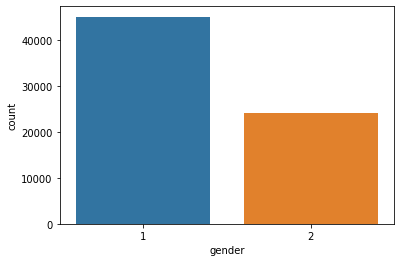

In [3]:
sns.countplot(cardio_vascular_data['gender'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


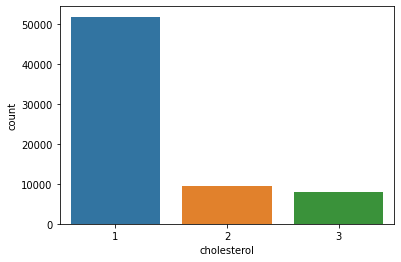

In [4]:
sns.countplot(cardio_vascular_data['cholesterol'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


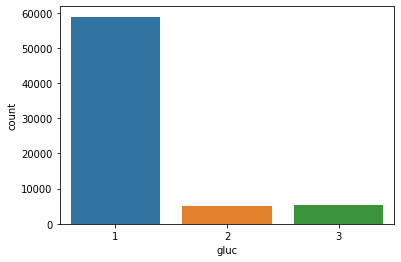

In [5]:
sns.countplot(cardio_vascular_data['gluc'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


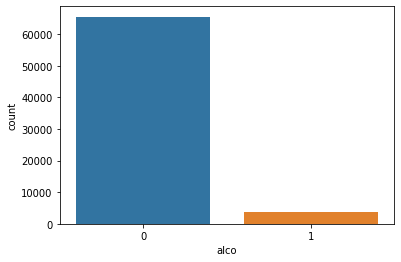

In [6]:
sns.countplot(cardio_vascular_data['alco'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


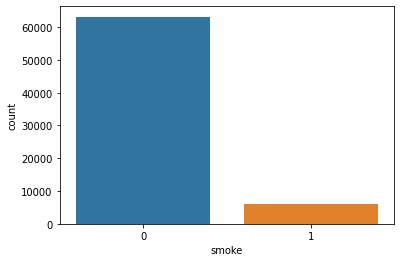

In [7]:
sns.countplot(cardio_vascular_data['smoke'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


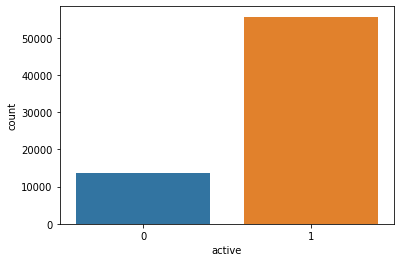

In [8]:
sns.countplot(cardio_vascular_data['active'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


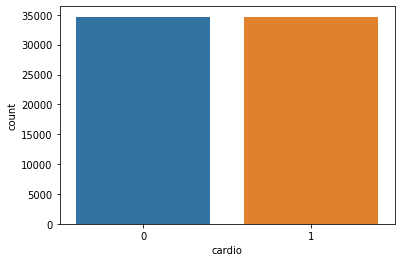

In [9]:
sns.countplot(cardio_vascular_data['cardio'])

**Data Preprocessing**

In [10]:
#Checking the datatypes for all the attributes in the dataset
cardio_vascular_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69301 entries, 0 to 69300
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           69301 non-null  int64  
 1   age          69301 non-null  int64  
 2   gender       69301 non-null  int64  
 3   height       69301 non-null  int64  
 4   weight       69301 non-null  float64
 5   ap_hi        69301 non-null  int64  
 6   ap_lo        69301 non-null  int64  
 7   cholesterol  69301 non-null  int64  
 8   gluc         69301 non-null  int64  
 9   smoke        69301 non-null  int64  
 10  alco         69301 non-null  int64  
 11  active       69301 non-null  int64  
 12  cardio       69301 non-null  int64  
dtypes: float64(1), int64(12)
memory usage: 6.9 MB


In [11]:
#Checking for null values in the dataset
cardio_vascular_data.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [12]:
#Checking for the starting and ending values to find out the outliers present in the dataset
cardio_vascular_data.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
#Age attribute is in the form of number of days. So, converting age to number of years.
cardio_vascular_data['age'] = cardio_vascular_data['age']/365.25

In [14]:
#Dropping the data entries where ap_hi and ap_lo are out of range.
cardio_vascular_data.drop(cardio_vascular_data.query('ap_hi >220 or ap_lo >180 or ap_hi<40 or ap_lo<40').index, axis=0, inplace=True)

In [15]:
#Displaying the top 5 entries from the datatset to check if the data is preprocessed properly.
cardio_vascular_data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,61.516769,1,155,69.0,130,80,2,2,0,0,1,0
1,989,40.104038,1,163,71.0,110,70,1,1,0,0,1,1
2,990,59.961670,1,165,70.0,120,80,1,1,0,0,1,0
3,991,39.832991,2,165,85.0,120,80,1,1,1,1,1,0
4,992,64.046543,1,155,62.0,120,80,1,1,0,0,1,0


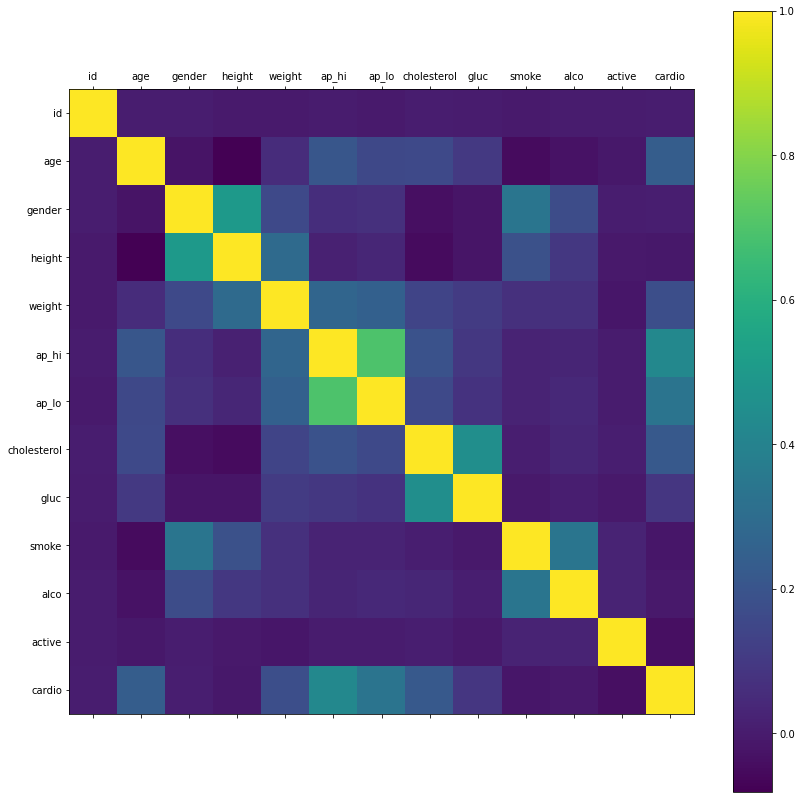

In [16]:
#Correlation matrix for finding out which attributes(features) are correlated.
rcParams['figure.figsize'] = 20, 14
plt.matshow(cardio_vascular_data.corr())
plt.yticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns)
plt.xticks(np.arange(cardio_vascular_data.shape[1]), cardio_vascular_data.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa69fcef110>,
      dtype=object)

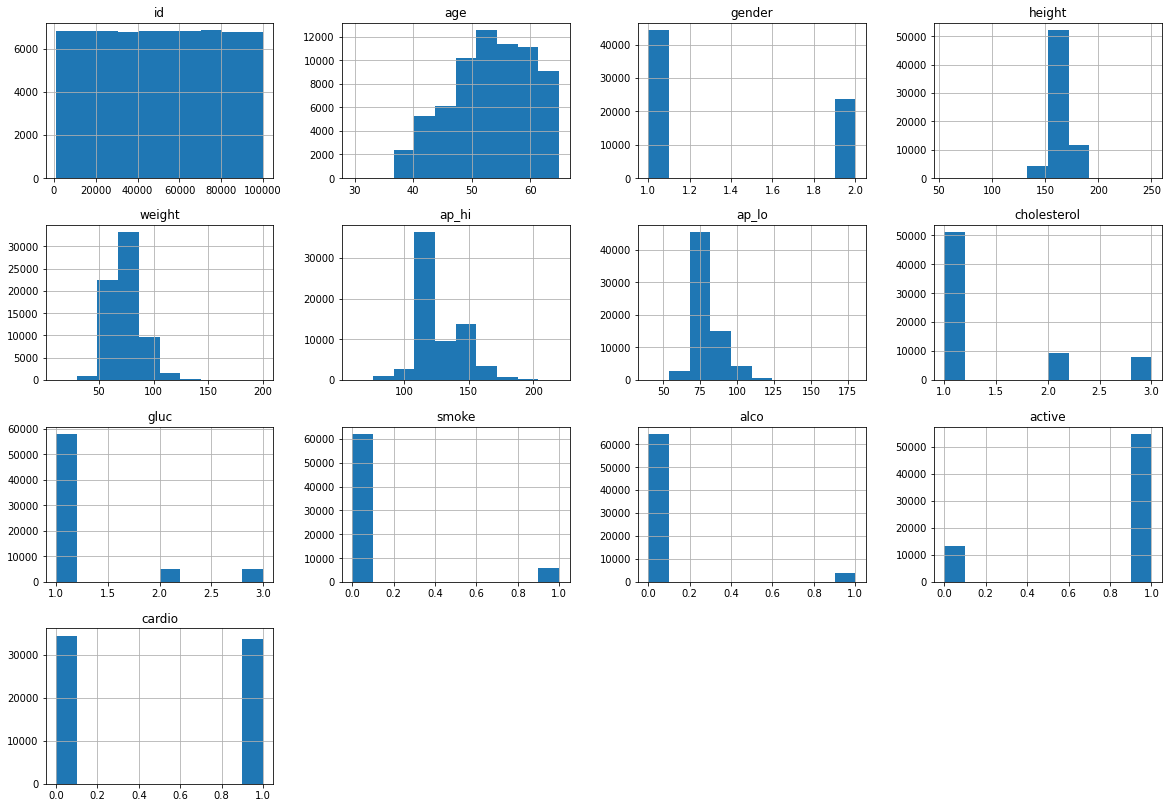

In [18]:
#Plotting a histogram for getting insights of the distribtuion of the data.
cardio_vascular_data.hist()

In [19]:
#Dropping attribute "id" as it is not important for classifying the CVD 
#and setting X(input features) and y(target variable) for using the classification model on the data.
cardio_vascular_data.drop(['id'], axis=1)
X = cardio_vascular_data.drop(['cardio'], axis=1)
y = cardio_vascular_data['cardio']

In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score 

**Applying Machine Learning Model to the Processed Data**

**Random Forest Classifier**

In [21]:
#Splitting the dataset into training and testing dataset and using the Random Forest Model for the classification
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = .66)
random_forest_model = RandomForestClassifier(n_estimators=200, max_depth=8, random_state=0)
random_forest_model.fit(X_train, y_train)
y_pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

print("Confusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test))

acc = accuracy_score(y_train, y_pred_train)
print("\n\nTraining Accuracy : ", acc)
acc = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy : ", acc)

Confusion Matrix for the Training Dataset
[[18518  4192]
 [ 7450 14770]]


Confusion Matrix for the Testing Dataset
[[9419 2265]
 [3894 7569]]


Training Accuracy :  0.740885822390385
Testing Accuracy :  0.7339180023329157


**Logistic Regression**

In [22]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

y_pred_train = pd.Series(logreg.predict(X_train))
y_pred_test = pd.Series(logreg.predict(X_test))

print("Confusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test))

acc = accuracy_score(y_train, y_pred_train)
print("\n\nTraining Accuracy: ", acc)
acc = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", acc)

Confusion Matrix for the Training Dataset
[[17397  5313]
 [ 8163 14057]]


Confusion Matrix for the Testing Dataset
[[8997 2687]
 [4233 7230]]


Training Accuracy:  0.7000667705319386
Testing Accuracy:  0.7010411716421134


**K Nearest Neighbours**

In [23]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 3)
classifier.fit(X_train, y_train)

y_pred_train = classifier.predict(X_train)
y_pred_test = classifier.predict(X_test)

print("Confusion Matrix for the Training Dataset")
print(confusion_matrix(y_train, y_pred_train))
print("\n\nConfusion Matrix for the Testing Dataset")
print(confusion_matrix(y_test, y_pred_test))

acc = accuracy_score(y_train, y_pred_train)
print("\n\nTraining Accuracy: ", acc)
acc = accuracy_score(y_test, y_pred_test)
print("Testing Accuracy: ", acc)

Confusion Matrix for the Training Dataset
[[18917  3793]
 [ 4880 17340]]


Confusion Matrix for the Testing Dataset
[[7707 3977]
 [4731 6732]]


Training Accuracy:  0.806966392165591
Testing Accuracy:  0.6237957402687173
